In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

train = pd.read_csv('../GPU_scores_graphicsAPIs.csv')
train.describe()

,CUDA,Metal,OpenCL,Vulkan
count,266.000000,241.000000,976.000000,629.000000
mean,57482.319549,29624.676349,25536.302254,25106.922099
std,65326.792548,33610.610759,37451.318235,27811.382105
min,1282.000000,26.000000,182.000000,23.000000
25%,9956.250000,5204.000000,3277.750000,4601.000000
50%,31058.000000,17314.000000,9252.500000,12579.000000
75%,84008.750000,41982.000000,34744.750000,38856.000000
max,260346.000000,166946.000000,229738.000000,144238.000000


In [209]:
# Display 25 Rows
train.head(25)

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan
0,Nvidia,GeForce RTX 3090 Ti,260346.0,NaN,229738.0,141134.0
1,Nvidia,A100 80GB PCIe,259828.0,NaN,214586.0,NaN
2,Nvidia,A100-PCIE-80GB,256292.0,NaN,207124.0,NaN
3,Nvidia,GeForce RTX 3090,238123.0,NaN,204921.0,138859.0
4,Nvidia,A100-SXM4-40GB,237220.0,NaN,190489.0,NaN
5,Nvidia,GeForce RTX 3080 Ti,235513.0,NaN,209081.0,131975.0
6,Nvidia,GRID A100-7-40C MIG 7g.40gb,233910.0,NaN,196825.0,NaN
7,Nvidia,RTX A6000,224604.0,NaN,200330.0,109243.0
8,Nvidia,GRID A100-4C,219037.0,NaN,NaN,NaN
9,Nvidia,Tesla V100S-PCIE-32GB,216224.0,NaN,186147.0,NaN


<AxesSubplot:xlabel='Manufacturer', ylabel='Vulkan'>

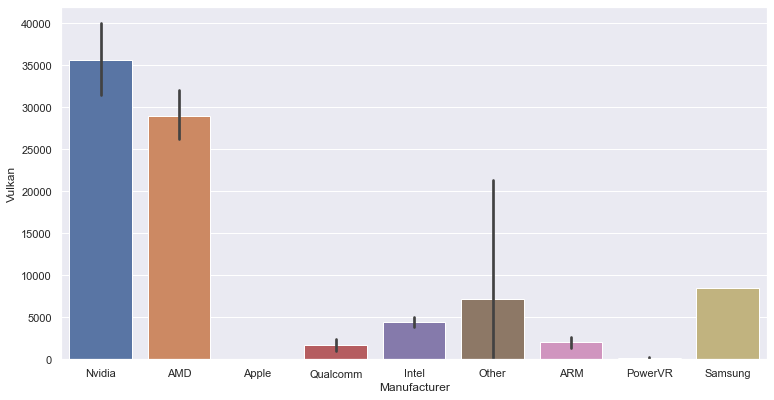

In [217]:
plt.rcParams["figure.figsize"] = (10,5)
sb.barplot(x=train.Manufacturer,y=train.Vulkan)

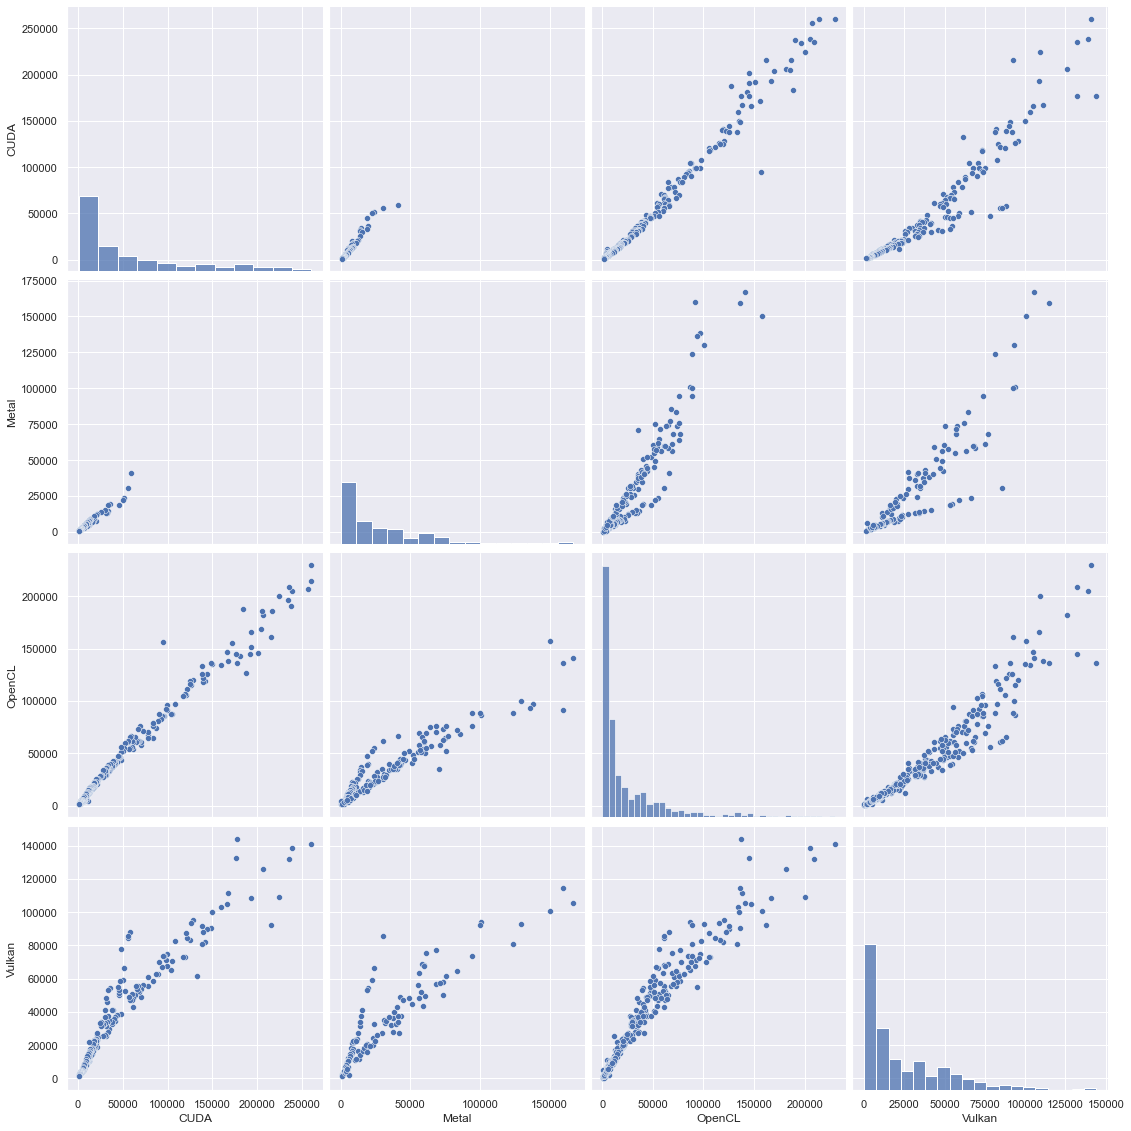

In [211]:
# Relationship between each Numerical Categories
sb.set()
cols = ['CUDA','Metal','OpenCL','Vulkan']
sb.pairplot(train[cols], height = 4)
plt.show();

In [212]:
train.OpenCL = np.log1p(train.OpenCL )
y = train.OpenCL

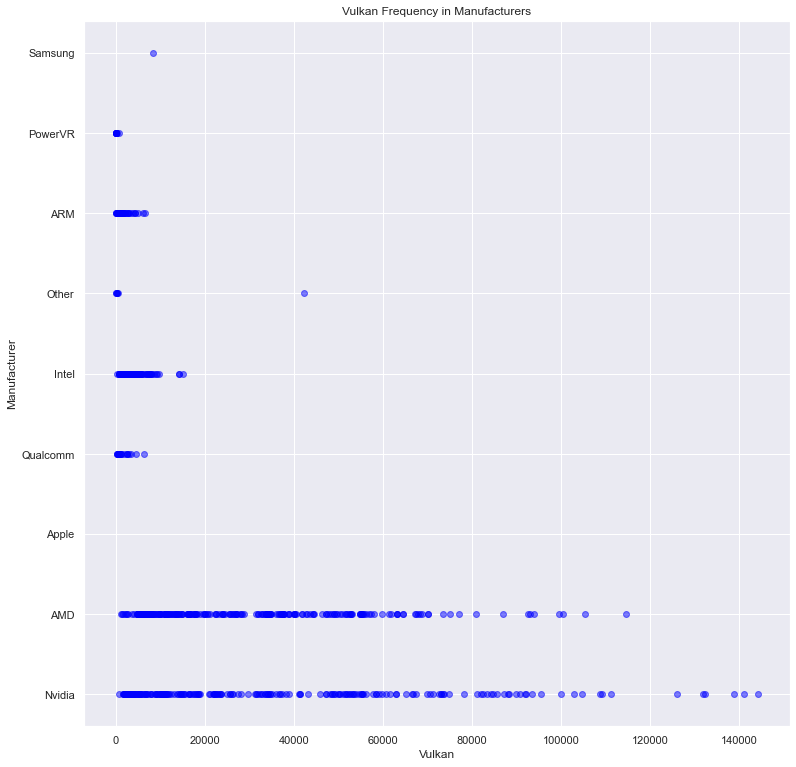

In [213]:
plt.scatter(y=train.Manufacturer,x = train.Vulkan,c='blue', alpha=0.5)
plt.gcf().set_size_inches((10, 10))    
plt.ylabel('Manufacturer')
plt.xlabel('Vulkan')
plt.title('Vulkan Frequency in Manufacturers')
plt.show()

In [214]:
# The amount of Nulls in each category of GPUs
train_nas = train.isnull().sum()
train_nas = train_nas[train_nas>0]
train_sort=train_nas.sort_values(ascending=False)
print(train_sort)

Metal     972
CUDA      947
Vulkan    584
OpenCL    237
dtype: int64


In [215]:
# To help determine which features are important in GPUs relative to Vulkan's API intended to offer higher performance and more efficient CPU and GPU 
# CUDA is a parallel computing platform and programming model created by NVIDIA
print("Highest coefficients to help determine which features are important in conjunction to Vulkan:")
corr = train.corr()
corr.sort_values(["Vulkan"], ascending = False, inplace = True)
print(corr.Vulkan)

Highest coefficients to help determine which features are important in conjunction to Vulkan:
Vulkan    1.000000
CUDA      0.947777
Metal     0.902328
OpenCL    0.877019
Name: Vulkan, dtype: float64


In [216]:
# Displaying number of Categorical and Numerical Features to help understand dataset
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
num_feat = train[numerical_features]
cat_feat = train[categorical_features]

Numerical features : 4
Categorical features : 2
